### Importación de datos



In [27]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Conociendo los datos

In [40]:
def info_tiendas(tiendap):
  return display(tiendap.info())

info_tiendas(tienda)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


None

#2. Análisis de facturación



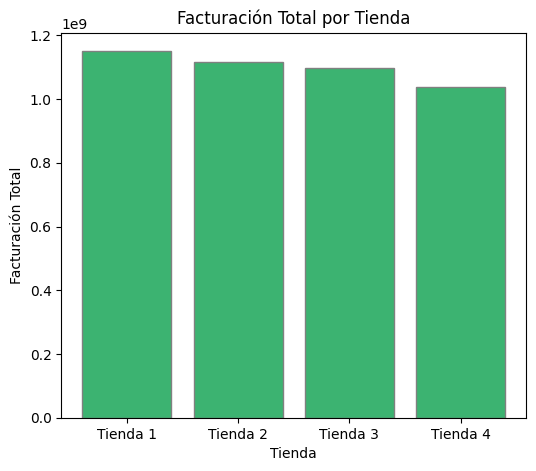

,Tienda,Facturación Total
0,Tienda 1,"1,150,880,400.00"
1,Tienda 2,"1,116,343,500.00"
2,Tienda 3,"1,098,019,600.00"
3,Tienda 4,"1,038,375,700.00"


In [121]:
def facturacion_total(t1, t2, t3, t4):

  facturacion_t1 = t1['Precio'].sum()
  facturacion_t2 = t2['Precio'].sum()
  facturacion_t3 = t3['Precio'].sum()
  facturacion_t4 = t4['Precio'].sum()


  pd.options.display.float_format = '{:,.2f}'.format

  datos = pd.DataFrame({
        'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
        'Facturación Total': [facturacion_t1, facturacion_t2, facturacion_t3, facturacion_t4]
  })

  plt.figure(figsize=(6, 5))
  plt.bar(datos['Tienda'], datos['Facturación Total'], color='mediumseagreen', edgecolor='grey')
  plt.title('Facturación Total por Tienda')
  plt.xlabel('Tienda')
  plt.ylabel('Facturación Total')
  plt.show()

  return datos

facturacion_total(tienda, tienda2, tienda3, tienda4)

# 2. Ventas por categoría

,Categoría del Producto,Cantidad de ventas
0,Artículos para el hogar,177
1,Deportes y diversión,277
2,Electrodomésticos,278
3,Electrónicos,451
4,Instrumentos musicales,177
5,Juguetes,315
6,Libros,185
7,Muebles,499


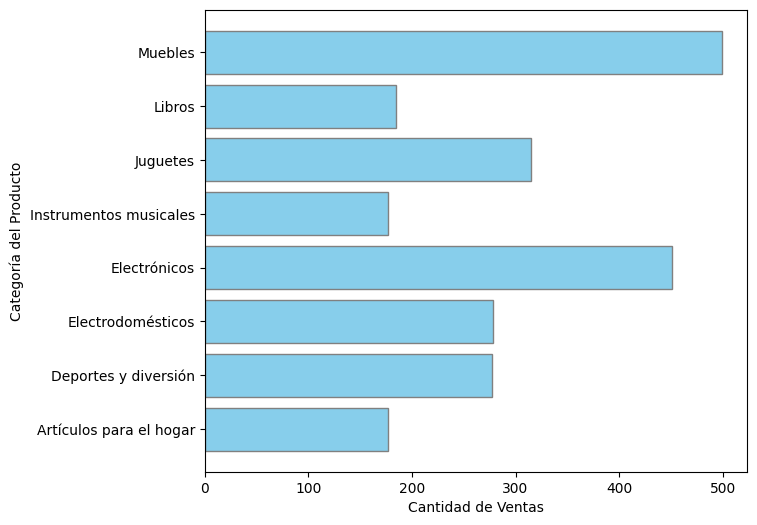

(None, None)

In [131]:
# tienda
# tienda2
# tienda3
# tienda4

def ventas_por_categoria(tiendap):
  ventas_categoria = tiendap.groupby('Categoría del Producto', as_index=False).size()
  ventas_categoria.rename(columns={'size': 'Cantidad de ventas'}, inplace=True)

  plt.figure(figsize=(7, 6))
  plt.barh(ventas_categoria['Categoría del Producto'], ventas_categoria['Cantidad de ventas'], color='skyblue', edgecolor='grey')
  plt.xlabel('Cantidad de Ventas')
  plt.ylabel('Categoría del Producto')

  return display(ventas_categoria), plt.show()


ventas_por_categoria(tienda3)

# 3. Calificación promedio de la tienda


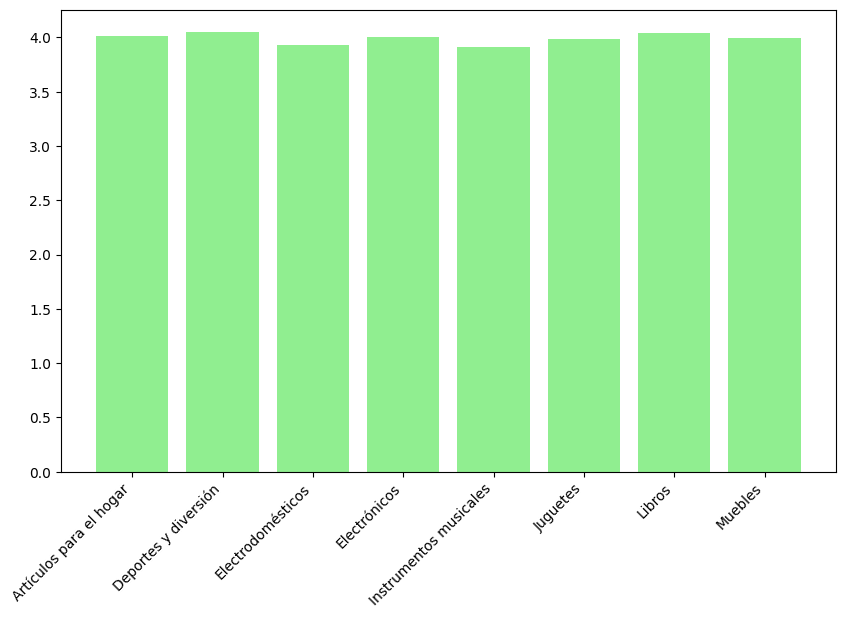

,Categoría del Producto,Calificacion Promedio
0,Artículos para el hogar,4.01
1,Deportes y diversión,4.05
2,Electrodomésticos,3.93
3,Electrónicos,4.01
4,Instrumentos musicales,3.91
5,Juguetes,3.99
6,Libros,4.04
7,Muebles,4.00


In [124]:
def calificacion_promedio(tiendap):
  calificacion_promedio = tiendap.groupby('Categoría del Producto', as_index=False)['Calificación'].mean()
  calificacion_promedio.rename(columns={'Calificación': 'Calificacion Promedio'}, inplace=True)


  plt.figure(figsize=(10, 6))
  plt.bar(calificacion_promedio['Categoría del Producto'], calificacion_promedio['Calificacion Promedio'], color = 'lightgreen')
  plt.xticks(rotation=45, ha='right')
  plt.show()
  return calificacion_promedio

calificacion_promedio(tienda4)

# 4. Productos más y menos vendidos

(                   Producto  size
 9   Bloques de construcción    35
 42             Set de vasos    36
 34                  Mochila    36,
            Producto  size
 27    Kit de bancas    57
 31  Mesa de comedor    56
 11        Cama king    56)

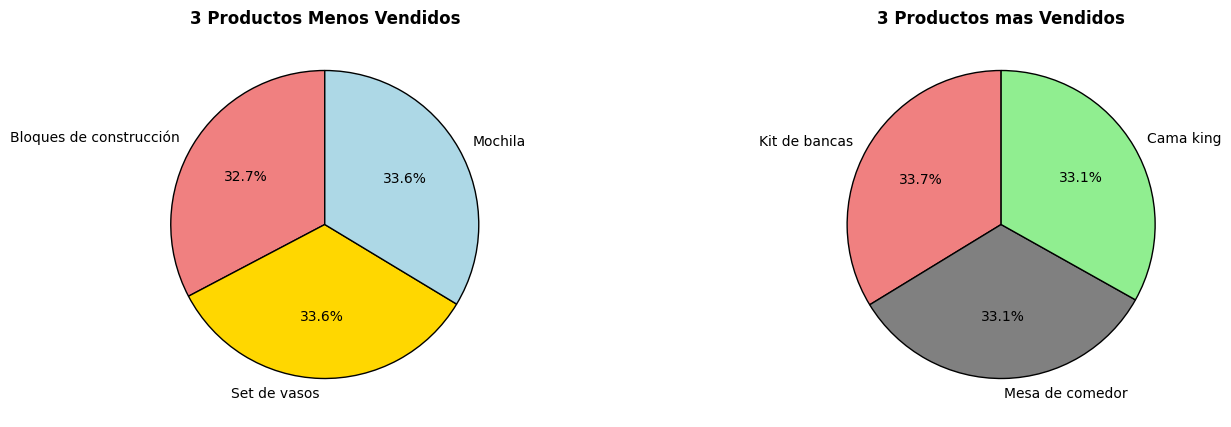

In [134]:
def productos_vendidos(tiendap):
  productos_menos_vendidos = tiendap.groupby('Producto', as_index=False).size().sort_values('size', ascending=True).head(3)
  productos_mas_vendidos = tiendap.groupby('Producto', as_index=False).size().sort_values('size', ascending=False).head(3)

  fig, axes = plt.subplots(1, 2, figsize=(16, 5))

  axes[0].pie(
        productos_menos_vendidos['size'],
        labels=productos_menos_vendidos['Producto'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['lightcoral', 'gold', 'lightblue'],
        wedgeprops={'edgecolor': 'black'}
    )
  axes[0].set_title('3 Productos Menos Vendidos', fontsize=12, fontweight='bold')
  axes[1].pie(
        productos_mas_vendidos['size'],
        labels=productos_mas_vendidos['Producto'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['lightcoral', 'grey', 'lightgreen'],
        wedgeprops={'edgecolor': 'black'}
    )
  axes[1].set_title('3 Productos mas Vendidos', fontsize=12, fontweight='bold')

  return productos_menos_vendidos, productos_mas_vendidos

productos_vendidos(tienda3)

# 5. Envío promedio por tienda

In [135]:
def envio_promedio(t1, t2, t3, t4):
  tiendap1 = t1['Costo de envío'].mean()
  tiendap2 = t2['Costo de envío'].mean()
  tiendap3 = t3['Costo de envío'].mean()
  tiendap4 = t4['Costo de envío'].mean()

  datos = pd.DataFrame({
        'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
        'Costo Envio': [tiendap1, tiendap2, tiendap3, tiendap4]
  })



  return datos


envio_promedio(tienda, tienda2, tienda3, tienda4)

,Tienda,Costo Envio
0,Tienda 1,"26,018.61"
1,Tienda 2,"25,216.24"
2,Tienda 3,"24,805.68"
3,Tienda 4,"23,459.46"


# Reporte Final.

Nuestro objetivo como analistas de datos en este proyecto es ayudar al señor Juan a decidir qué tienda el debería vender para invertir en un nuevo negocio.

Con base a esto investigaremos en las 4 tiendas que el posee y realizaremos una investigación sobre las ganancias, el costo de envió, los productos más populares etc.

**Los ingresos totales de las tiendas:**

Se calculo los ingresos totales de las 4 tiendas, lo que nos dio como resultado que la tienda que menos ingresos genera es la tienda número 4.

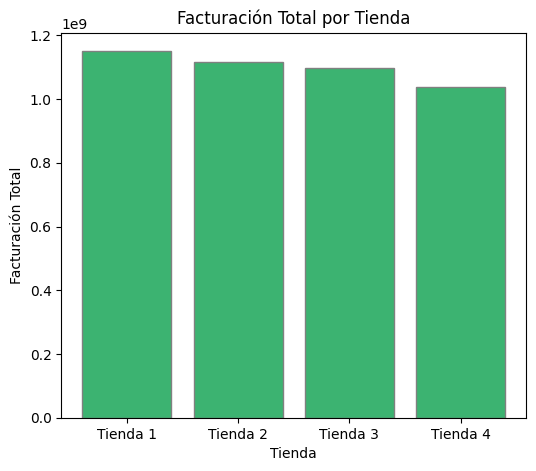


***Tienda 1***


*   Producto mas y menos vendido: (Auriculares con Microfono: 32) (TV 4K: 60)
*   Costo promedio de envio: 26,018.61
*   Categoria de producto mas vendido: Muebles
*   Calificacion de la gente: 4.00

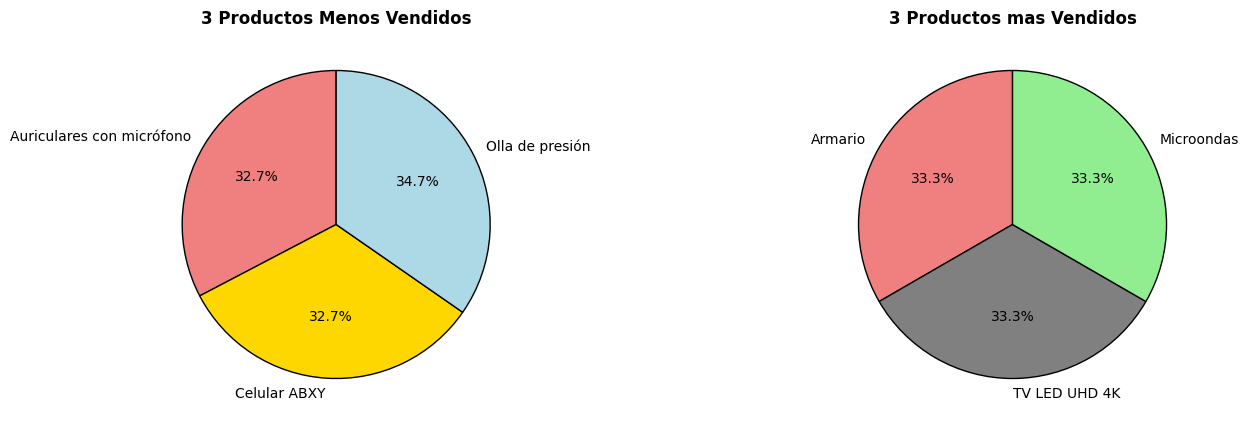

***Tienda 2***


*   Producto mas y menos vendido: (Juego de mesa: 32) (Iniciando en    Programacion: 65)
*   Costo promedio de envio: 25,216.24
*   Categoria de producto mas vendido: Muebles
*   Calificacion de la gente: 4.01

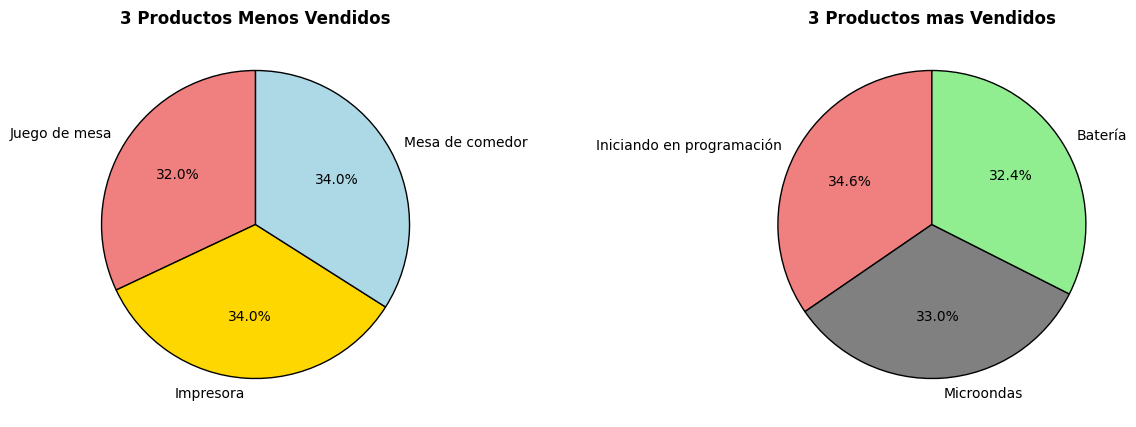

***Tienda 3***


*   Producto mas y menos vendido: (Bloques de Construccion: 33) (Kit de bancas: 62)
*   Costo promedio de envio: 24,805.68
*   Categoria de producto mas vendido: Muebles
*   Calificacion de la gente: 4.00

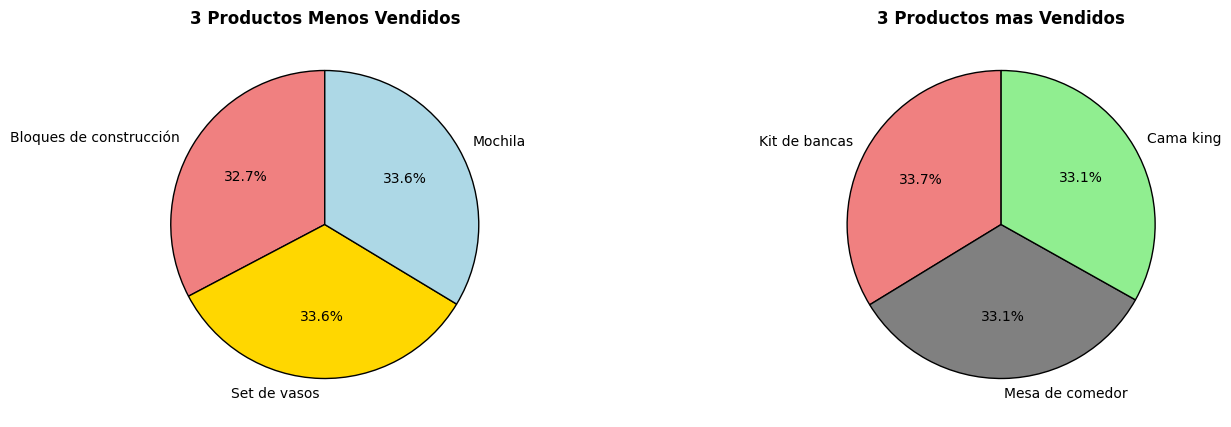

***Tienda 4***


*   Producto mas y menos vendido: (Guitarra electrica: 33) (Cama box 62)
*   Costo promedio de envio: 23,459.46
*   Categoria de producto mas vendido: Electronicos
*   Calificacion de la gente: 3.99

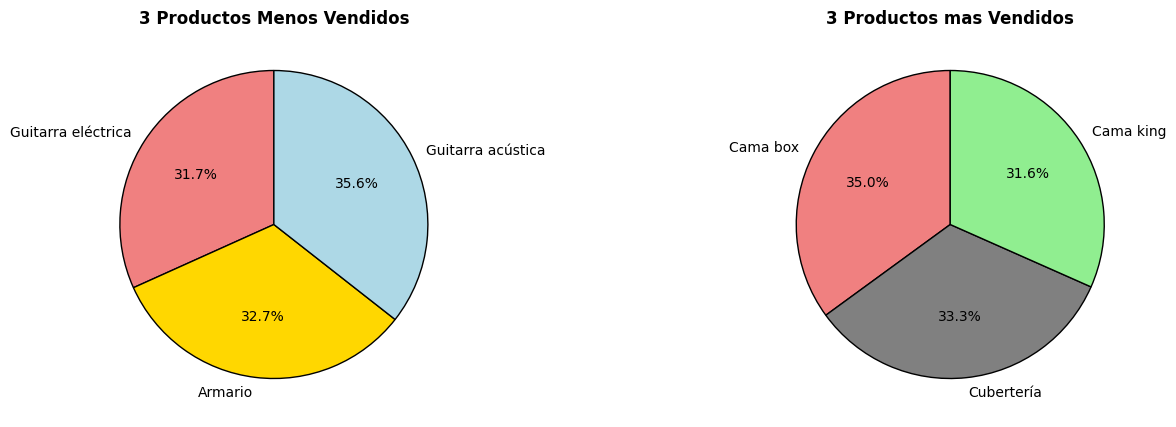

Tomando en cuenta los datos de las tiendas podemos destacar lo siguiente: la tienda 1 es la mas fuerte pues sus productos son de mas alto valor y así el costo promedio de envió sube. Y la más débil es la tienda 4, pues sus productos son más sencillos. Por ende, sus ganancias son las más bajas.
La decisión basada en datos que podría ayudar al señor Juan a decidir es que se decida a vender la tienda 4, pues sus ganancias son menores a las de las otras tiendas.








